In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, callbacks
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score, precision_recall_fscore_support, classification_report, f1_score
import umap
import mygene
from gprofiler import GProfiler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.dummy import DummyClassifier
import os
from matplotlib.backends.backend_pdf import PdfPages

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
#Mettre une seed pour la reproductibilité
tf.random.set_seed(555)

# **Load la matrice d'expression et les metadata**

In [3]:
X = pd.read_csv("../data/THCA_expression_matrix_final.csv", index_col=0)
X = X.T

In [4]:
X.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12


### ajout des metadata à la matrice d'expression

In [5]:
labels = pd.Index(X.index)   # index = patients

age = (
   labels
   .str.extract(r"AGE=(\d+)ANS")[0]
   .astype(float))

sex = (
   labels
   .str.extract(r"SEX=([a-zA-Z]+)")[0]
   .str.lower()
   .map({"male": 1, "female": 0}))

# ATTENTION !! Eviter d'utiliser les metadata suivantes dans X_full. 
# elles sont ajoutées seulement si on en a besoin pour un modèle

stage = (
    labels
    .str.extract(r"STAGE=([^_]+_[^_]+)")[0]) # ne pas ajouter à X_full

stage_map = {
    "Stade_I": 0,
    "Stade_II": 1,
    "Stade_III": 2,
    "Stade_IV": 3
} # ne pas ajouter à X_full
stage_enc = stage.map(stage_map)

mutation = (
    labels
    .str.extract(r"MUT=([^_]+)")[0]) # ne pas ajouter à X_full


X_full = X.copy()
#X_full["age"] = age.values
#X_full["sex"] = sex.values

X_full

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4742,3,2172,1171,245,372,5861,3069,1740,2560,...,0,0,29,0,0,0,377,0,3,23
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3753,4,1491,962,166,184,1663,2433,1244,1713,...,0,0,59,0,0,0,489,0,17,3
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4488,5,2061,1151,250,775,9620,2795,2425,2753,...,0,0,24,0,0,0,539,0,6,11
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,6131,6,2439,1213,242,1076,8511,3439,3132,2428,...,0,0,8,0,0,0,458,0,4,35


# **Définition de la cible qu'on cherche à prédire**

voir si on peut pas accumuler plusieurs prédictions par la suite

Choisissez la variable que vous voulez prédire en remplacant "choix" par le nom de la liste que vous voulez :

In [6]:
liste_des_prédictions = ["stade_tumoral", "type_tumoral", "mutation"]
choix = "mutation"

### _**préparation des inputs + labels du modèle**_

Pour prédire le stade tumoral on va prédire 1 état parmi 2 possibilités : 
- **0** : stade précoce (stade I et II)
- **1** : stade avancé (stade III et IV) 
c'est utile de regrouper les stades en 2 catégories car il y a peu de patients dans les stades III et IV, ca permet d'avoir un dataset plus équilibré pour l'entrainement du modèle.


ici, j'ai crée une fonction qui réuni les 3 prédictions qu'on voudrait faire. 
Pour chaque prédiction, la variable cible est identifiée (comme label)

| Nombre de classes | Format des labels | Activation finale | Loss |
|------------|------------|------------|------------|
| 2 classes (binaire)    | 0/1    | sigmoid    |binary_crossentropy    |
| ≥3 classes (entiers)   | 0,1,2...    | softmax    |sparse_categorical_crossentropy    |
| ≥3 classes (one-hot)     | [1,0,01, [0,1,0], ...]   | softmax    |categorical_crossentropy    |
| Valeurs continues    | floats  | aucune (ou linear)    |mse / mae    |

In [7]:
def build_task(choix, X):
    labels_index = pd.Index(X.index)
    X_out = X.copy()

    if choix == "stade_tumoral":
        # extraire le stade depuis le nom
        stade = pd.Series(stage.values, index=X_out.index)

        # garder uniquement les patients avec un stade défini
        # mask = stade != "Stage_NA"
        # X_out = X_out.loc[mask]
        # early vs late
        # labels = stade.loc[mask].isin(
        #     ["Stade_III", "Stade_IV"]
        # ).astype(int).values

        mask = stade.isin(["Stade_I", "Stade_II", "Stade_III", "Stade_IV"])

        X_out = X_out.loc[mask]
        stade = stade.loc[mask]

        stage_map = {"Stade_I": 0, "Stade_II": 1, "Stade_III": 2, "Stade_IV": 3}

        labels = stade.map(stage_map).values

        class_names = ["Stade_I", "Stade_II", "Stade_III", "Stade_IV"]
        n_classes = 4 # nombre de neurones de sortie
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"
        encoder = None
    
    elif choix == "type_tumoral":
        tumor_type = pd.Series(labels_index.str.extract(r"TYPE=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(tumor_type)
        
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    elif choix == "mutation":
        mutation = pd.Series(
            labels_index.str.extract(r"MUT=([^_]+)")[0].values,
            index=X_out.index
        )
        mask = mutation != "EIF1AX"

        X_out = X_out.loc[mask]
        mutation = mutation.loc[mask]

        encoder = LabelEncoder()
        labels = encoder.fit_transform(mutation)

        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"
        
    else:
        raise ValueError(
            "le choix doit etre 'stade_tumoral', 'type_tumoral' ou 'mutation'"
        )

    return X_out, labels, encoder, loss, class_names, n_classes, output_activation

X_out, labels, encoder, loss, class_names, n_classes, output_activation = build_task(choix, X_full)

In [8]:
print(f"les labels de {choix} : \n{labels}")

les labels de mutation : 
[0 1 0 1 0 0 0 0 0 0 2 0 1 0 1 1 2 0 1 0 0 0 1 0 1 2 0 2 2 0 0 0 1 1 0 1 0
 0 0 1 0 1 1 0 0 0 2 0 0 0 2 0 1 1 0 0 1 0 1 0 0 1 1 0 2 0 1 0 0 0 1 1 1 1
 0 0 0 0 1 0 2 0 1 0 1 1 0 1 1 0 1 2 1 2 1 1 2 1 2 1 1 1 0 1 1 1 0 0 2 1 1
 1 0 1 0 0 1 1 0 0 2 1 0 1 0 1 2 1 1 1 0 2 1 2 0 0 1 1 0 1 0 1 0 0 1 1 1 0
 1 1 1 2 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 2 0 1 1 0 0 1 1 0 0 0
 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 2 0 1 0 1 1 0 1 1 2 1 0 0 1 1
 0 2 1 0 1 0 1 1 2 0 1 0 0 1 0 1 0 0 1 0 2 0 0 0 2 1 0 2 2 0 1 1 0 0 1 0 1
 2 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 2 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1
 1 2 1 1 0 1 1 0 1 0 2 1 1 2 0 0 0 0 0 2 0 1 1 1 0 1 1 1 1 0 0 2 0 2 0 1 2
 2 0 0 0 0 2 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 2 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 0 2 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 2 1 1 0 0 2 1 0 1 1 0 1 1
 0 2 0 0 1 1 0 1 1 0 0 0 2 1 0 1 1 0 1 1 1 1 0 0 2 0 0 0 0 1 0 1 1 0 2 1 1
 1 1 0 1 1 0 0 1 0 2 2 1 1 0 1 0 2 1 0 0 0 1 1 0 1 1]


In [9]:
print(f"l'input de la matrice d'expression pour {choix} : \n{X_out}")

l'input de la matrice d'expression pour mutation : 
                                                    ENSG00000000003.15  \
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stad...                6156   
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stad...                7191   
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stad...                2219   
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stag...                5185   
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stad...                4466   
...                                                                ...   
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stad...                4742   
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_...                3753   
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stad...                4488   
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stad...                6131   
ID=TCGA-EL-A3ZS_AGE=22ANS_SEX=female_STAGE=Stad...                4097   

                                                    ENSG000

In [10]:
print(f"les classes qu'on veut prédire de {choix} sont : \n{class_names}")

les classes qu'on veut prédire de mutation sont : 
['BRAF', 'NO', 'RAS']


In [11]:
values, counts = np.unique(labels, return_counts=True)

for v, c in zip(values, counts):
    print(f"Classe {v} : {c}")

Classe 0 : 215
Classe 1 : 205
Classe 2 : 50


# **UMAP & PCA**

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


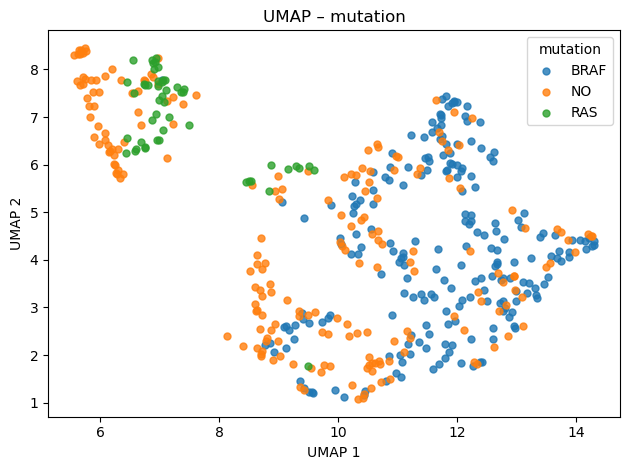

In [12]:
# standardization
X_log = np.log1p(X_out)

# UMAP 
frequences_umap = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42).fit_transform(X_log)

plt.figure()
for i, name in enumerate(class_names):
    mask = labels == i
    plt.scatter(frequences_umap[mask, 0], frequences_umap[mask, 1], label=name,s=25, alpha=0.8)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP – {choix}")
plt.legend(title=f"{choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/UMAP_{choix}.pdf")
plt.show()

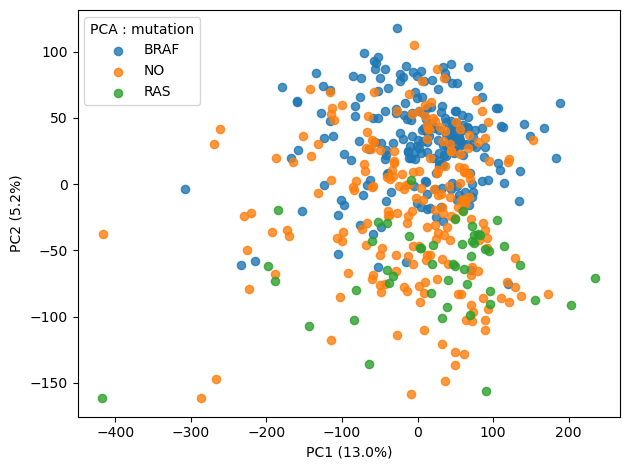

In [13]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_log))
df_pca = pd.DataFrame(X_pca, index=X_out.index, columns=["PC1", "PC2"])

# map les labels 
label_map = dict(enumerate(class_names))
df_pca["label"] = labels
df_pca["class_name"] = df_pca["label"].map(label_map)

# Plot
plt.figure()

for i, name in enumerate(class_names):
    subset = df_pca[df_pca["label"] == i]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=name,
        alpha=0.8,
        s=35)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title=f"PCA : {choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/PCA_{choix}.pdf")
plt.show()


# **Split les données train et test**

splitting

In [14]:
# Split train/validation/test par HVG
X_train, X_temp, y_train, y_temp = train_test_split(
    X_out, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")



Tailles des ensembles:
Train: 329
Validation: 70
Test: 71


In [15]:
#Preprocessing n°2, sélection par ANOVA des gènes les plus significatifs pour distinguer les classes
k=50 #nombre de gènes conservés
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train, y_train)
mask = selector.get_support()

X_train = X_train.loc[:, mask]
X_val   = X_val.loc[:, mask]
X_test  = X_test.loc[:, mask]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [16]:
def print_class_distribution(y, name, class_names=None):
    counts = pd.Series(y).value_counts().sort_index()

    print(f"\n{name} set:")
    for cls, n in counts.items():
        if class_names is not None:
            print(f"  {class_names[cls]}: {n}")
        else:
            print(f"  Class {cls}: {n}")
            
print_class_distribution(y_train, "Train", class_names)
print_class_distribution(y_val,   "Validation", class_names)
print_class_distribution(y_test,  "Test", class_names)


Train set:
  BRAF: 150
  NO: 144
  RAS: 35

Validation set:
  BRAF: 32
  NO: 30
  RAS: 8

Test set:
  BRAF: 33
  NO: 31
  RAS: 7


In [17]:
# log transform
X_train_log = np.log1p(X_train)
X_test_log  = np.log1p(X_test)
X_val_log  = np.log1p(X_val)

# scaler (FIT SUR LE TRAIN UNIQUEMENT)
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_log)
X_test_final  = scaler.transform(X_test_log)
X_val_final  = scaler.transform(X_val_log)

In [18]:
# encode labels si nécessaire
# if labels.dtype == object:
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test  = label_encoder.transform(y_test)
#     n_classes = len(label_encoder.classes_)
# else:
#     n_classes = len(np.unique(y_train))

### Vérification des données avant entrainement

In [19]:
print("NaN par colonne (top 10):")
print(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False).head(10))
if sum(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False)) >0 : 
    print("ATTENTION : il y'a des NaN")

NaN par colonne (top 10):
0     0
37    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64


In [20]:
def sanity_checks(X, y, name=""):
    assert not np.isnan(X).any(), f"{name}: NaN in X"
    assert not np.isinf(X).any(), f"{name}: Inf in X"
    assert len(np.unique(y)) > 1, f"{name}: single class only"
    print(f"{name} OK")

sanity_checks(X_train_final, y_train, "TRAIN")
sanity_checks(X_val_final, y_val, "VAL")
sanity_checks(X_test_final, y_test, "TEST")

TRAIN OK
VAL OK
TEST OK


ici, il faut faire attention. Si une catégorie est en dessous de 5, on ne peut pas l'utiliser

In [21]:
for split, y in zip(
    ["train", "val", "test"],
    [y_train, y_val, y_test]
):
    print(split, np.bincount(y))

train [150 144  35]
val [32 30  8]
test [33 31  7]


# **Modèle dense à 3 couches**

trop de gènes par rapport au nombre de patients peut accroitre l'overfitting. On fait un modèle qui n'a que 3 couches


In [22]:
def build_model(input_dim, n_classes, output_activation, loss):
    """
    Construit et compile un réseau de neurones dense pour classification
    binaire ou multi-classe selon l'activation de sortie.
    """
    learning_rate=1e-3 
    l2_reg=1e-4
    dropout_rate=0.2
    
    inputs = keras.Input(shape=(input_dim,))

    # Backbone
    x = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(inputs)
    x = keras.layers.Dropout(dropout_rate)(x)
    
    x = keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)

    # Output layer
    outputs = keras.layers.Dense(n_classes, activation=output_activation)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [23]:
# définition du modèle
model = build_model(
    input_dim=X_train_final.shape[1],
    n_classes=n_classes,
    output_activation=output_activation,
    loss=loss
)

# définition du early stop
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

In [24]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,643 (33.76 KB)

 Trainable params: 8,643 (33.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_final, y_train)
dummy.score(X_test_final, y_test)


0.4647887323943662

# **Training**

In [26]:
training_history = model.fit(
    X_train_final,
    y_train,
    validation_data=(X_val_final, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5532 - loss: 0.9411 - val_accuracy: 0.6571 - val_loss: 0.8350
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7052 - loss: 0.6988 - val_accuracy: 0.6857 - val_loss: 0.7349
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7325 - loss: 0.6204 - val_accuracy: 0.7000 - val_loss: 0.6868
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7508 - loss: 0.5854 - val_accuracy: 0.7143 - val_loss: 0.6669
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7842 - loss: 0.5418 - val_accuracy: 0.7286 - val_loss: 0.6585
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8055 - loss: 0.5008 - val_accuracy: 0.7286 - val_loss: 0.6496
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7812 - loss: 0.5137 - val_accuracy: 0.7143 - val_loss: 0.6377
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7994 - loss: 0.4858 - val_accuracy: 0.7000 - 

# **Evaluation**

## *Training evaluation*

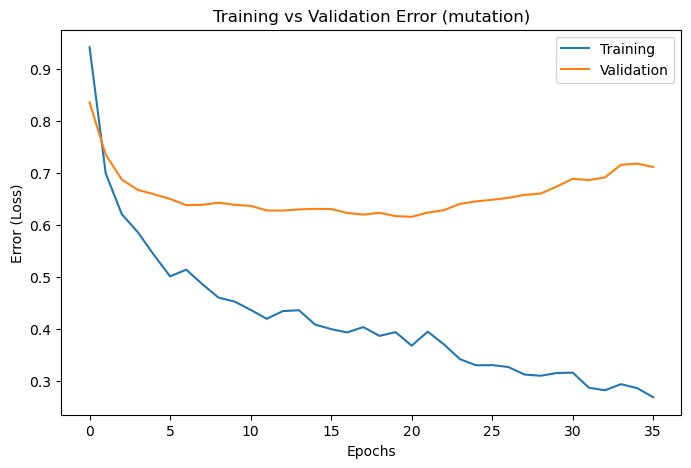

In [27]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'], label='Training')
plt.plot(training_history.history['val_loss'], label='Validation')
plt.title(f'Training vs Validation Error ({choix})')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

In [28]:
def predict_classes(model, X, choix):
    probs = model.predict(X)

    # if choix == "stade_tumoral":
    #     # binaire
    #     preds = (probs.flatten() >= 0.5).astype(int)
    # else:
    #     # multi-classes
    preds = np.argmax(probs, axis=1)

    return probs, preds

In [29]:
def evaluate_model(y_true, y_pred, class_names=None, title="Confusion matrix"):

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    # noms des classes
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print("Evaluation summary:")
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision (macro): {precision:.3f}")
    print(f" Recall (macro):    {recall:.3f}")
    print(f" F1-score (macro):  {f1:.3f}")
    print("\nDetailed classification report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return cm_df

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


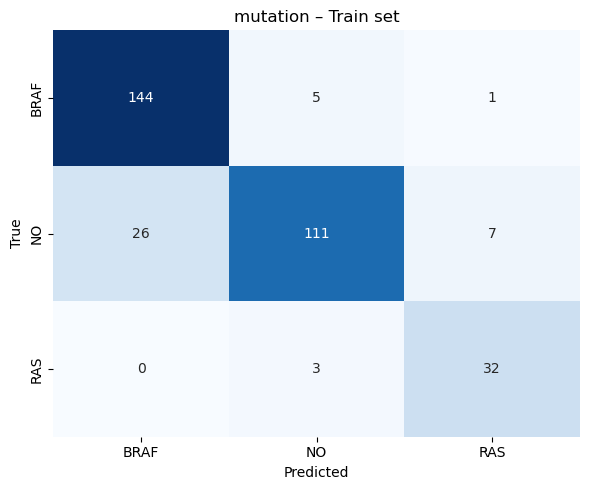

Evaluation summary:
 Accuracy:  0.872
 Precision (macro): 0.860
 Recall (macro):    0.882
 F1-score (macro):  0.866

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.85      0.96      0.90       150
          NO       0.93      0.77      0.84       144
         RAS       0.80      0.91      0.85        35

    accuracy                           0.87       329
   macro avg       0.86      0.88      0.87       329
weighted avg       0.88      0.87      0.87       329



,BRAF,NO,RAS
BRAF,144,5,1
NO,26,111,7
RAS,0,3,32


In [30]:
probs_train, y_train_pred = predict_classes(model, X_train_final, choix)

evaluate_model(
    y_train,
    y_train_pred,
    class_names=class_names,
    title=f"{choix} – Train set"
)

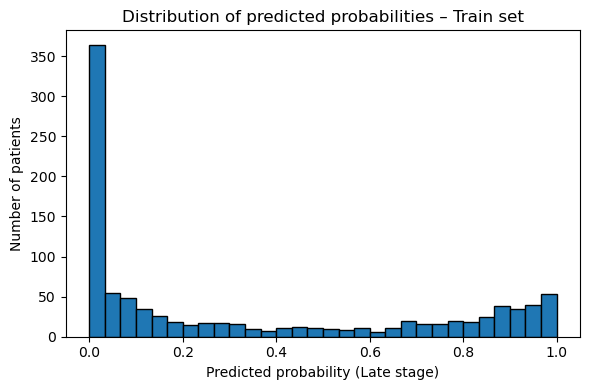

In [31]:
probs = probs_train.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Train set")
plt.tight_layout()
plt.show()

In [32]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_train, y_train_pred)

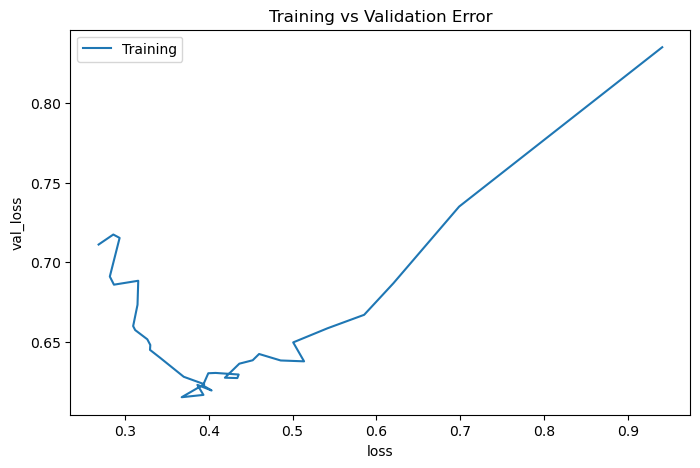

In [33]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'],training_history.history['val_loss'], label='Training')
# plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

## *Test Evaluation*

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


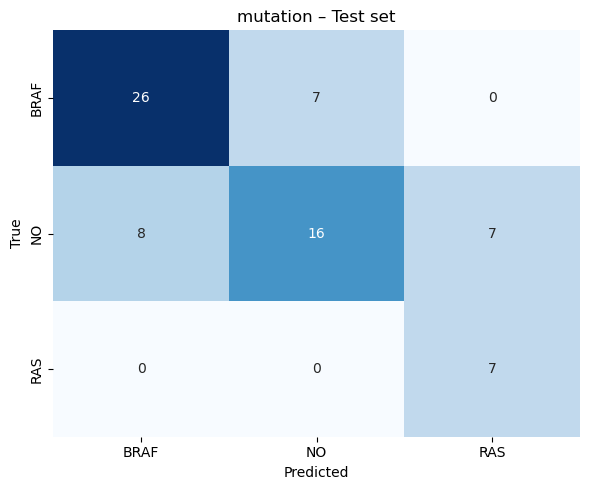

Evaluation summary:
 Accuracy:  0.690
 Precision (macro): 0.653
 Recall (macro):    0.768
 F1-score (macro):  0.678

Detailed classification report:

              precision    recall  f1-score   support

        BRAF       0.76      0.79      0.78        33
          NO       0.70      0.52      0.59        31
         RAS       0.50      1.00      0.67         7

    accuracy                           0.69        71
   macro avg       0.65      0.77      0.68        71
weighted avg       0.71      0.69      0.69        71



,BRAF,NO,RAS
BRAF,26,7,0
NO,8,16,7
RAS,0,0,7


In [34]:
probs_test, y_test_pred  = predict_classes(model, X_test_final, choix)

evaluate_model(
    y_test,
    y_test_pred,
    class_names=class_names,
    title=f"{choix} – Test set"
)

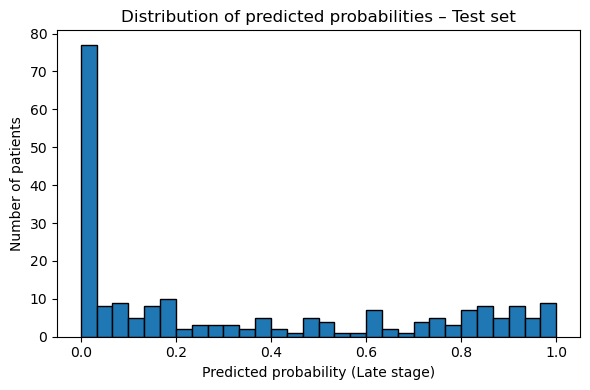

In [35]:
probs = probs_test.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Test set")
plt.tight_layout()
plt.show()

In [36]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_test, y_test_pred)

## *Cross Validation*

In [37]:
def train_eval_one_fold(X, y, train_idx, test_idx, k_genes=500):

    X_train = X.iloc[train_idx]
    X_test  = X.iloc[test_idx]
    y_train = y[train_idx]
    y_test  = y[test_idx]

    # ----- ANOVA (FIT SUR TRAIN) -----
    selector = SelectKBest(f_classif, k=k_genes)
    selector.fit(X_train, y_train)

    mask = selector.get_support()
    X_train = X_train.loc[:, mask]
    X_test  = X_test.loc[:, mask]

    # ----- Scaling (FIT SUR TRAIN) -----
    X_train = np.log1p(X_train)
    X_test  = np.log1p(X_test)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test  = scaler.transform(X_test)

    # ----- Model -----
    model = build_model(
        input_dim=X_train.shape[1],
        n_classes=n_classes,
        output_activation=output_activation,
        loss=loss
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=10, restore_best_weights=True
    )

    model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=150,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0
    )

    # ----- Evaluation -----
    probs = model.predict(X_test, verbose=0)
    preds = np.argmax(probs, axis=1)

    acc = accuracy_score(y_test, preds)
    f1  = f1_score(y_test, preds, average="macro")

    return acc, f1

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accs = []
f1s = []

for i, (train_idx, test_idx) in enumerate(skf.split(X_out, labels)):
    print(f"Fold {i+1}")

    acc, f1 = train_eval_one_fold(
        X_out, labels, train_idx, test_idx, k_genes=500
    )

    print(f"  Accuracy: {acc:.3f} | F1: {f1:.3f}")
    accs.append(acc)
    f1s.append(f1)

print("\n=== Cross-validation results ===")
print(f"Accuracy: {np.mean(accs):.3f} ± {np.std(accs):.3f}")
print(f"F1-score: {np.mean(f1s):.3f} ± {np.std(f1s):.3f}")

Fold 1


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.766 | F1: 0.765
Fold 2


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.787 | F1: 0.799
Fold 3


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.702 | F1: 0.639
Fold 4


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


  Accuracy: 0.723 | F1: 0.732
Fold 5


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## *Enregistrer les résultats en pdf*

In [ ]:
def save_full_evaluation_pdf(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    class_names,
    history,
    choix,
    output_dir="../results"
):

    os.makedirs(output_dir, exist_ok=True)
    pdf_path = f"{output_dir}/evaluation_{choix}.pdf"

    def compute_metrics(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="macro"
        )
        report = classification_report(
            y_true, y_pred, target_names=class_names
        )
        cm = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        return acc, precision, recall, f1, report, cm_df


    with PdfPages(pdf_path) as pdf:

        # ===== TRAIN =====
        acc, precision, recall, f1, report, cm_df = compute_metrics(
            y_train, y_train_pred
        )

        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix – TRAIN ({choix})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        fig, ax = plt.subplots(figsize=(8, 10))
        ax.axis("off")
        ax.text(
            0.01, 0.98,
            f"TRAIN SET\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n",
            va="top",
            fontsize=11
        )
        ax.text(0.01, 0.60, report, va="top", family="monospace", fontsize=9)
        ax.set_title(f"Train evaluation – {choix}", fontsize=14)
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        # ===== TEST =====
        acc, precision, recall, f1, report, cm_df = compute_metrics(
            y_test, y_test_pred
        )

        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix – TEST ({choix})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        fig, ax = plt.subplots(figsize=(8, 10))
        ax.axis("off")
        ax.text(
            0.01, 0.98,
            f"TEST SET\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n",
            va="top",
            fontsize=11
        )
        ax.text(0.01, 0.60, report, va="top", family="monospace", fontsize=9)
        ax.set_title(f"Test evaluation – {choix}", fontsize=14)
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        # ===== LEARNING CURVE =====
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(history.history["loss"], label="Train loss")
        ax.plot(history.history["val_loss"], label="Validation loss")
        ax.set_title(f"Training vs Validation loss – {choix}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

    print(f"PDF sauvegardé : {pdf_path}")

save_full_evaluation_pdf(
    y_train=y_train,
    y_train_pred=y_train_pred,
    y_test=y_test,
    y_test_pred=y_test_pred,
    class_names=class_names,
    history=training_history,
    choix=choix
)

PDF sauvegardé : ../results/evaluation_mutation.pdf


# **Feature Importance**

## *Construction des fonctions*

In [ ]:
def model_score_class(model, X, y, class_idx):
    probs = model.predict(X, verbose=0)
    preds = np.argmax(probs, axis=1)

    y_true_bin = (y == class_idx).astype(int)
    y_pred_bin = (preds == class_idx).astype(int)

    # F1 one-vs-rest pour la classe class_idx
    return f1_score(y_true_bin, y_pred_bin)

def permutation_importance_nn_class(model, X, y, class_idx, n_repeats=5, random_state=42):
    rng = np.random.RandomState(random_state)

    baseline = model_score_class(model, X, y, class_idx)
    print(f"Baseline F1 (class {class_idx}):", baseline)

    importances = np.zeros(X.shape[1])

    for j in range(X.shape[1]):
        scores = []
        X_perm = X.copy()

        for _ in range(n_repeats):
            perm_idx = rng.permutation(X.shape[0])
            X_perm[:, j] = X_perm[perm_idx, j]
            score = model_score_class(model, X_perm, y, class_idx)
            scores.append(baseline - score)

        importances[j] = np.mean(scores)

    return importances

## *Calcul de l'importance de chaque gène*

In [ ]:
all_fi = {}

for i, cname in enumerate(class_names):
    print("\nClass:", cname)
    imp = permutation_importance_nn_class(
        model,
        X_test_final,
        y_test,
        i,
        n_repeats=5
    )
    all_fi[cname] = imp


Class: BRAF
Baseline F1 (class 0): 0.7761194029850746

Class: NO
Baseline F1 (class 1): 0.6181818181818182

Class: RAS
Baseline F1 (class 2): 0.7


In [ ]:
selected_genes = X_test.columns.to_numpy()
fi_list = []

for cname, imp in all_fi.items():
    df = pd.DataFrame({
        "ensembl_id": selected_genes,
        "importance": imp,
        "class": cname
    })
    fi_list.append(df)

fi_class = pd.concat(fi_list, ignore_index=True)

fi_class["ensembl_clean"] = fi_class["ensembl_id"].str.replace(r"\.\d+$", "", regex=True)

## *Mapping ensembl_ID <--> vrais noms*

In [ ]:
mg = mygene.MyGeneInfo()

res = mg.querymany(
    fi_class["ensembl_clean"].unique().tolist(),
    scopes="ensembl.gene",
    fields="symbol",
    species="human",
    as_dataframe=True
)

annot = res[["symbol"]].reset_index()
annot.columns = ["ensembl_clean", "symbol"]

fi_class_annot = fi_class.merge(annot, on="ensembl_clean", how="left")

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


In [ ]:
for cname in class_names:
    print("\nTop genes for", cname)
    top = (
        fi_class_annot[fi_class_annot["class"] == cname]
        .sort_values("importance", ascending=False)
        .head(10)
    )
    print(top[["symbol", "importance"]])


Top genes for BRAF
        symbol  importance
39      EPHA10    0.047476
49  FAM111A-DT    0.045907
14       LLGL1    0.045662
38        NQO1    0.036003
22      MBOAT2    0.034799
5         PALM    0.030246
19        WTIP    0.026656
17       HMGA1    0.026189
44        GJB3    0.022481
40       KCNQ3    0.022481

Top genes for NO
        symbol  importance
89      EPHA10    0.071915
64       LLGL1    0.025731
99  FAM111A-DT    0.025588
94        GJB3    0.018157
55        PALM    0.017279
90       KCNQ3    0.015149
69        WTIP    0.014998
73     PLEKHA6    0.013169
80       MXRA8    0.013092
67       HMGA1    0.012469

Top genes for RAS
       symbol  importance
139    EPHA10    0.083550
102       BID    0.054737
123   PLEKHA6    0.054737
108    TGFBR1    0.047719
131     ABTB2    0.041871
145  SERPINA1    0.041053
143   SEPTIN9    0.034503
132      PBX3    0.032157
110   SLC35F2    0.026667
137    FAM20C    0.020468


## *Résultats Feature Importance*

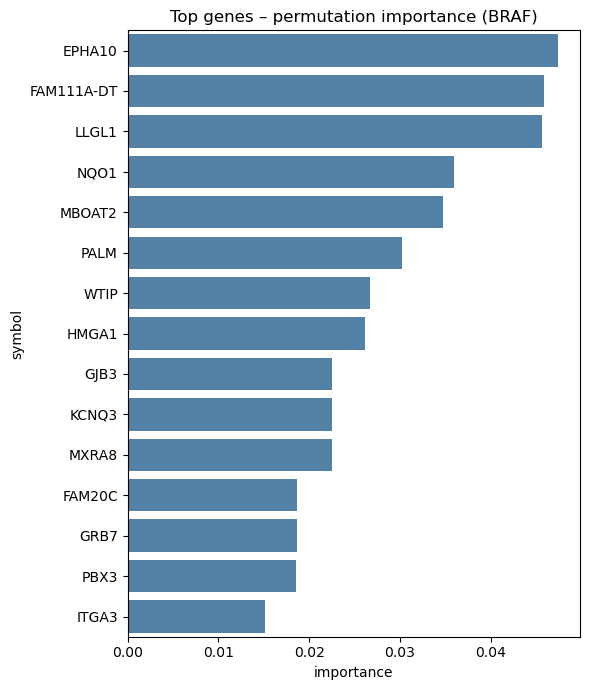

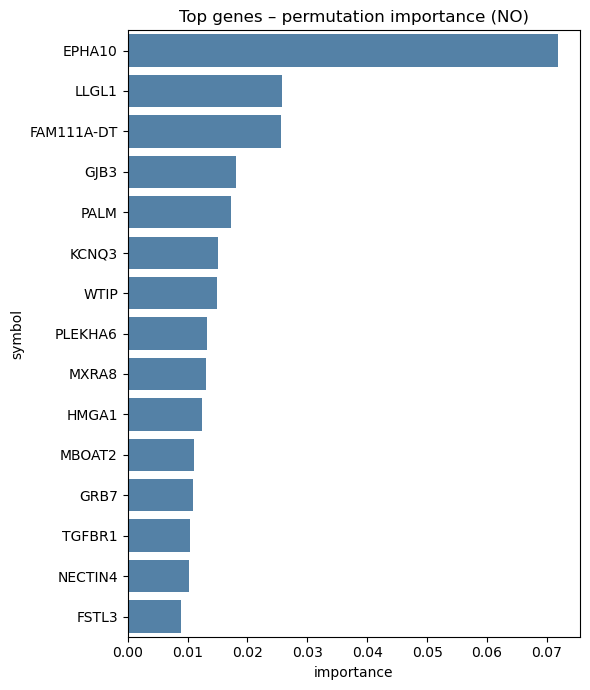

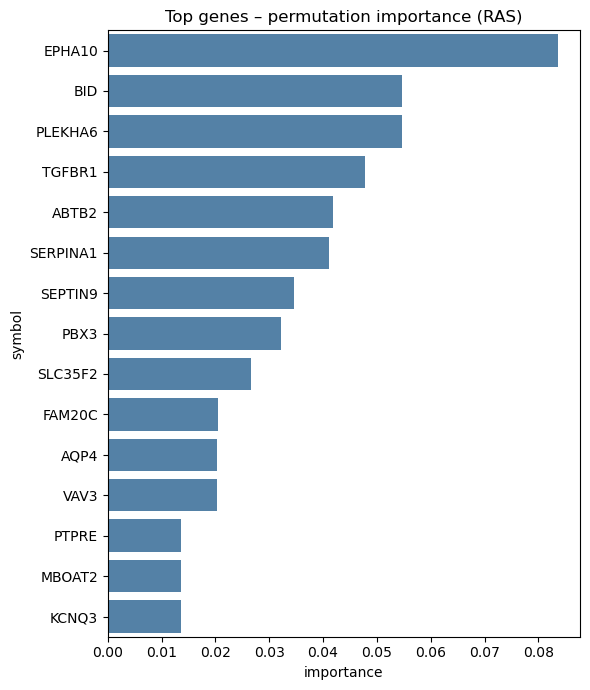

In [ ]:
for cname in class_names:
    dfp = (
        fi_class_annot[fi_class_annot["class"] == cname]
        .sort_values("importance", ascending=False)
        .head(15)
    )

    plt.figure(figsize=(6,7))
    sns.barplot(data=dfp, x="importance", y="symbol", color="steelblue")
    plt.title(f"Top genes – permutation importance ({cname})")
    plt.tight_layout()
    plt.show()

## *Enrichissement fonction (GO + KEGG) des top gènes importants*

In [ ]:
topN = 100

genes_braf = (
    fi_class_annot[fi_class_annot["class"] == "BRAF"]
    .sort_values("importance", ascending=False)
    .head(topN)["symbol"]
    .dropna()
    .unique()
    .tolist()
)

genes_ras = (
    fi_class_annot[fi_class_annot["class"] == "RAS"]
    .sort_values("importance", ascending=False)
    .head(topN)["symbol"]
    .dropna()
    .unique()
    .tolist()
)
print("Nb gènes BRAF:", len(genes_braf))
print(genes_braf[:10])

print("Nb gènes RAS:", len(genes_ras))
print(genes_ras[:10])

Nb gènes BRAF: 49
['EPHA10', 'FAM111A-DT', 'LLGL1', 'NQO1', 'MBOAT2', 'PALM', 'WTIP', 'HMGA1', 'GJB3', 'KCNQ3']
Nb gènes RAS: 49
['EPHA10', 'BID', 'PLEKHA6', 'TGFBR1', 'ABTB2', 'SERPINA1', 'SEPTIN9', 'PBX3', 'SLC35F2', 'FAM20C']


In [ ]:
gp = GProfiler(return_dataframe=True)
go_braf = gp.profile(
    organism="hsapiens",
    query=genes_braf,
    sources=["GO:BP", "GO:MF", "GO:CC"]
)

print(go_braf.head())

go_braf_sig = go_braf[go_braf["p_value"] < 0.05]
print("GO significatifs (BRAF):", go_braf_sig.shape[0])

go_braf_sig[["source", "name", "p_value", "intersection_size"]].head(10)

go_ras = gp.profile(
    organism="hsapiens",
    query=genes_ras,
    sources=["GO:BP", "GO:MF", "GO:CC"]
)

go_ras_sig = go_ras[go_ras["p_value"] < 0.05]

print("GO significatifs (RAS):", go_ras_sig.shape[0])
go_ras_sig[["source", "name", "p_value", "intersection_size"]].head(10)

  source      native                name   p_value  significant  \
0  GO:CC  GO:0070161  anchoring junction  0.000033         True   
1  GO:CC  GO:0030054       cell junction  0.000061         True   
2  GO:CC  GO:0071944      cell periphery  0.000076         True   
3  GO:CC  GO:0005886     plasma membrane  0.000285         True   
4  GO:CC  GO:0016020            membrane  0.000665         True   

                                         description  term_size  query_size  \
0  "A cell junction that mechanically attaches a ...        912          44   
1  "A cellular component that forms a specialized...       2401          44   
2  "The broad region around and including the pla...       6347          44   
3  "The membrane surrounding a cell that separate...       5866          44   
4  "A lipid bilayer along with all the proteins a...       9953          44   

   intersection_size  effective_domain_size  precision    recall    query  \
0                 12                  22149  

,source,name,p_value,intersection_size
0,GO:CC,anchoring junction,0.000033,12
1,GO:CC,cell junction,0.000061,18
2,GO:CC,cell periphery,0.000076,29
3,GO:CC,plasma membrane,0.000285,27
4,GO:CC,membrane,0.000665,35
5,GO:CC,basal plasma membrane,0.005501,6
6,GO:BP,response to stimulus,0.006499,34
7,GO:BP,multicellular organism development,0.007275,24
8,GO:CC,basal part of cell,0.007833,6
9,GO:CC,endoplasmic reticulum lumen,0.008119,6


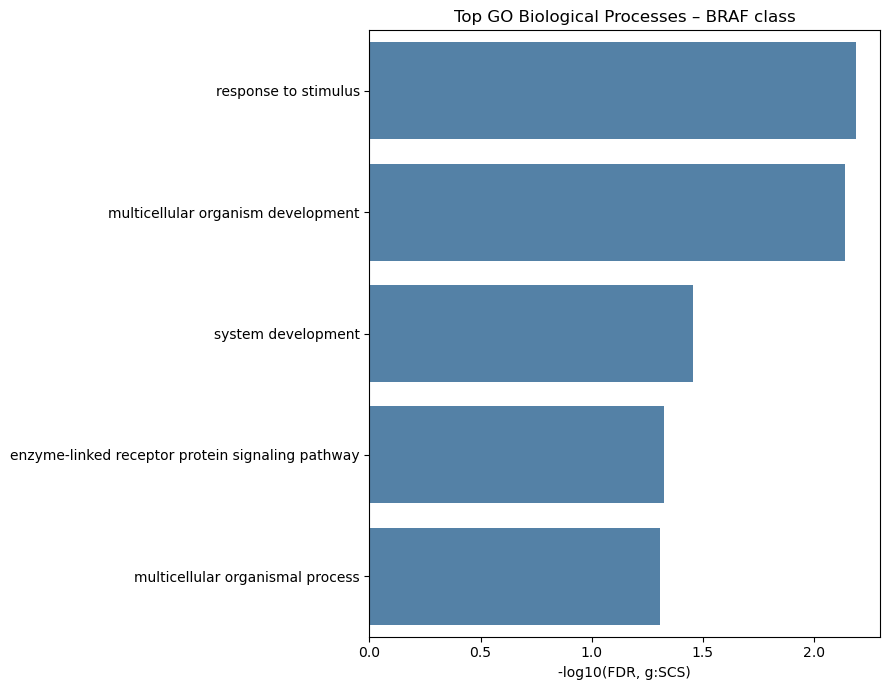

In [ ]:
bp = go_braf_sig[go_braf_sig["source"] == "GO:BP"].copy()
bp = bp.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(bp["p_value"]),
    y=bp["name"],
    color="steelblue"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top GO Biological Processes – BRAF class")
plt.tight_layout()
plt.show()

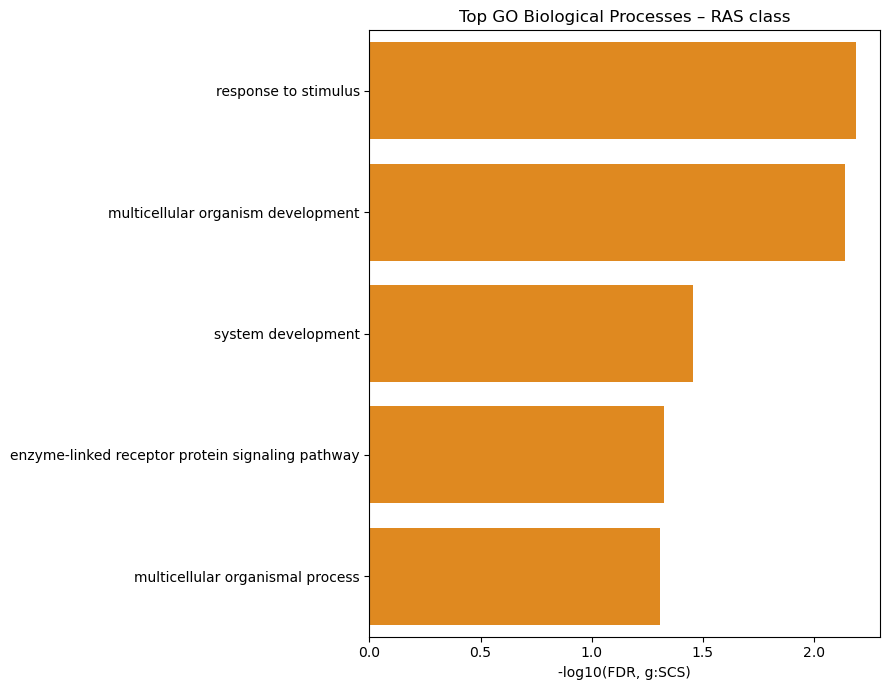

In [ ]:
bp_ras = go_ras_sig[go_ras_sig["source"] == "GO:BP"].copy()
bp_ras = bp_ras.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(bp_ras["p_value"]),
    y=bp_ras["name"],
    color="darkorange"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top GO Biological Processes – RAS class")
plt.tight_layout()
plt.show()

In [ ]:
kegg_braf = gp.profile(
    organism="hsapiens",
    query=genes_braf,
    sources=["KEGG"]
)

kegg_ras = gp.profile(
    organism="hsapiens",
    query=genes_ras,
    sources=["KEGG"]
)

kegg_ras_sig = kegg_ras[kegg_ras["p_value"] < 0.05]

print("KEGG significatifs (RAS):", kegg_ras_sig.shape[0])
kegg_ras_sig[["name", "p_value", "intersection_size"]].head(10)
kegg_braf_sig = kegg_braf[kegg_braf["p_value"] < 0.05]

print("KEGG significatifs (BRAF):", kegg_braf_sig.shape[0])
kegg_braf_sig[["name", "p_value", "intersection_size"]].head(10)

KEGG significatifs (RAS): 1
KEGG significatifs (BRAF): 1


,name,p_value,intersection_size
0,Adherens junction,0.01078,4


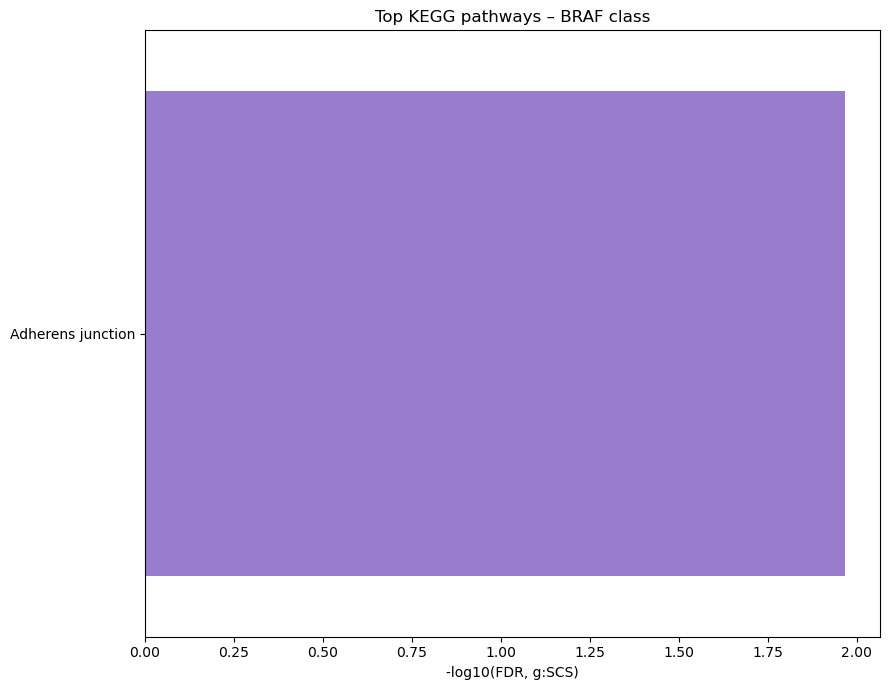

In [ ]:
kegg_plot = kegg_braf_sig.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(kegg_plot["p_value"]),
    y=kegg_plot["name"],
    color="mediumpurple"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top KEGG pathways – BRAF class")
plt.tight_layout()
plt.show()

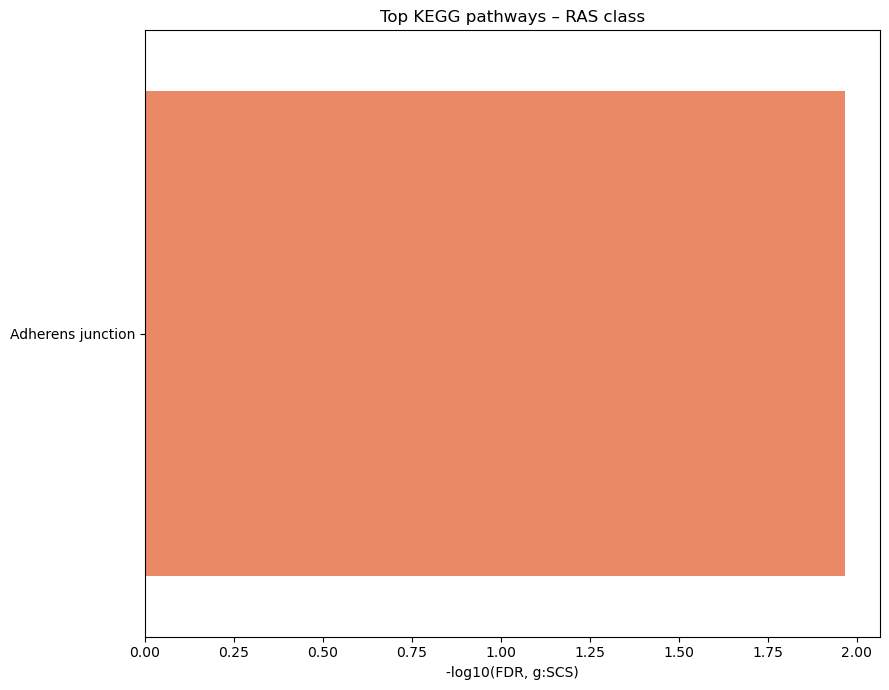

In [ ]:
kegg_plot_ras = kegg_ras_sig.sort_values("p_value").head(15)

plt.figure(figsize=(9,7))
sns.barplot(
    x=-np.log10(kegg_plot_ras["p_value"]),
    y=kegg_plot_ras["name"],
    color="coral"
)
plt.xlabel("-log10(FDR, g:SCS)")
plt.ylabel("")
plt.title("Top KEGG pathways – RAS class")
plt.tight_layout()
plt.show()